# The Matthew effect of accumulated advantage


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import re
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-development-indicators/hashes.txt
/kaggle/input/world-development-indicators/CountryNotes.csv
/kaggle/input/world-development-indicators/Footnotes.csv
/kaggle/input/world-development-indicators/Country.csv
/kaggle/input/world-development-indicators/Indicators.csv
/kaggle/input/world-development-indicators/database.sqlite
/kaggle/input/world-development-indicators/SeriesNotes.csv
/kaggle/input/world-development-indicators/Series.csv


* ## Pre-processing the Data 

In [2]:
# Setup the format for pandas 
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 2000)

Pre-processing and clean up the indicators

In [3]:
document = pd.read_csv('../input/world-development-indicators/Indicators.csv')
# Check all the countries listed in the document  
document['CountryName'].unique()

#get rid of indicators that are regions instead of countries 
list = ['Arab World', 'Caribbean small states', 'Central Europe and the Baltics',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)', 'Euro area',
 'Europe & Central Asia (all income levels)',
 'Europe & Central Asia (developing only)', 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)', 'High income',
 'High income: nonOECD', 'High income: OECD',
 'Latin America & Caribbean (all income levels)',
 'Latin America & Caribbean (developing only)',
 'Least developed countries: UN classification', 'Low & middle income',
 'Low income', 'Lower middle income',
 'Middle East & North Africa (all income levels)',
 'Middle East & North Africa (developing only)', 'Middle income',
 'North America' 'OECD members' ,'Other small states',
 'Pacific island small states', 'Small states', 'South Asia',
 'Sub-Saharan Africa (all income levels)',
 'Sub-Saharan Africa (developing only)' ,'Upper middle income' ,'World', 'North America', 'OECD members']

Extract the indicator code based on keywords 

In [4]:
# Create list of unique indicators, indicator codes
Indicator_array =  document[['IndicatorName','IndicatorCode']].drop_duplicates().values
modified_indicators = []
unique_indicator_codes = []
for ele in Indicator_array:
    indicator = ele[0]
    indicator_code = ele[1].strip()
    if indicator_code not in unique_indicator_codes:
        # delete , ( ) from the IndicatorNames
        new_indicator = re.sub('[,()]',"",indicator).lower()
        # replace - with "to" and make all words into lower case
        new_indicator = re.sub('-'," to ",new_indicator).lower()
        modified_indicators.append([new_indicator,indicator_code])
        unique_indicator_codes.append(indicator_code)

Indicators = pd.DataFrame(modified_indicators,columns=['IndicatorName','IndicatorCode'])
Indicators = Indicators.drop_duplicates()

# Define Key word dictionary on specific topics
key_word_dict = {}
key_word_dict['Demography'] = ['population','birth','death','fertility','mortality','expectancy']
key_word_dict['Food'] = ['food','grain','nutrition','calories']
key_word_dict['Trade'] = ['trade','import','export','good','shipping','shipment']
key_word_dict['Health'] = ['health','desease','hospital','mortality','doctor']
key_word_dict['Economy'] = ['income','gdp','gni','deficit','budget','market','stock','bond','infrastructure']
key_word_dict['Energy'] = ['fuel','energy','power','emission','electric','electricity']
key_word_dict['Education'] = ['education','literacy']
key_word_dict['Employment'] =['employed','employment','umemployed','unemployment']
key_word_dict['Rural'] = ['rural','village']
key_word_dict['Urban'] = ['urban','city']

# Pick required fields
feature = 'Economy'
for indicator_ele in Indicators.values:
    for ele in key_word_dict[feature]:
        word_list = indicator_ele[0].split()
        if ele in word_list or ele+'s' in word_list:
            print(indicator_ele)
            break

['international migrant stock % of population' 'SM.POP.TOTL.ZS']
['international migrant stock total' 'SM.POP.TOTL']
['merchandise exports to high to income economies % of total merchandise exports'
 'TX.VAL.MRCH.HI.ZS']
['merchandise imports from high to income economies % of total merchandise imports'
 'TM.VAL.MRCH.HI.ZS']
['merchandise trade % of gdp' 'TG.VAL.TOTL.GD.ZS']
['gdp at market prices current us$' 'NY.GDP.MKTP.CD']
['gdp per capita current us$' 'NY.GDP.PCAP.CD']
['gni current us$' 'NY.GNP.MKTP.CD']
['net oda received % of gni' 'DT.ODA.ODAT.GN.ZS']
['co2 emissions kg per 2005 us$ of gdp' 'EN.ATM.CO2E.KD.GD']
['exports of goods and services % of gdp' 'NE.EXP.GNFS.ZS']
['external balance on goods and services % of gdp' 'NE.RSB.GNFS.ZS']
['gdp at market prices constant 2005 us$' 'NY.GDP.MKTP.KD']
['gdp per capita constant 2005 us$' 'NY.GDP.PCAP.KD']
['general government final consumption expenditure % of gdp'
 'NE.CON.GOVT.ZS']
['gni constant 2005 us$' 'NY.GNP.MKTP.KD']
['gni 

## Growth of Income 

### GNI Per Capita, Atlas Method (Current US$)
[GNI per capita](https://datacatalog.worldbank.org/gni-capita-atlas-method-current-us-0#:~:text=GNI\%20is\%20the\%20sum\%20of,and\%20property\%20income\)\%20from\%20abroad.) (formerly GNP per capita) is the gross national income, converted to U.S. dollars using the World Bank Atlas method, divided by the midyear population. GNI is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. GNI, calculated in national currency, is usually converted to U.S. dollars at official exchange rates for comparisons across economies, although an alternative rate is used when the official exchange rate is judged to diverge by an exceptionally large margin from the rate actually applied in international transactions. 

In [5]:
ele = 'income'
for indicator_ele in Indicators.values:
    word_list = indicator_ele[0].split()
    if ele in word_list or ele+'s' in word_list:
        print(indicator_ele)

['merchandise exports to high to income economies % of total merchandise exports'
 'TX.VAL.MRCH.HI.ZS']
['merchandise imports from high to income economies % of total merchandise imports'
 'TM.VAL.MRCH.HI.ZS']
['gross domestic income constant 2005 us$' 'NY.GDY.TOTL.KD']
['net income from abroad current lcu' 'NY.GSR.NFCY.CN']
['net income from abroad current us$' 'NY.GSR.NFCY.CD']
['gross domestic income constant lcu' 'NY.GDY.TOTL.KN']
['net secondary income bop current us$' 'BN.TRF.CURR.CD']
['net income from abroad constant lcu' 'NY.GSR.NFCY.KN']
['adjusted net national income current us$' 'NY.ADJ.NNTY.CD']
['adjusted net national income per capita current us$' 'NY.ADJ.NNTY.PC.CD']
['adjusted net national income constant 2005 us$' 'NY.ADJ.NNTY.KD']
['adjusted net national income per capita constant 2005 us$'
 'NY.ADJ.NNTY.PC.KD']
['primary income on fdi payments current us$' 'BX.KLT.DREM.CD.DT']
['debt service ppg and imf only % of exports of goods services and primary income'
 'DT.TD

Indictoar of interest: 'gni per capita ppp current international $' 'NY.GNP.PCAP.PP.CD'

In [6]:
years = document.loc[document['IndicatorCode'] == 'NY.GNP.PCAP.CD',['Year']].Year.unique()
GNI_1962 = document.query("IndicatorCode == 'NY.GNP.PCAP.CD' & CountryName != list & Year == 1962").sort_values(by = 'Value', ascending = True)
documentCountry = document.query("CountryName != list")
rank_dict = {country:rankIdx for rankIdx, country in enumerate(GNI_1962['CountryName'])}
documentCountry['CountryRank'] = documentCountry['CountryName'].map(rank_dict)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
documentCountry

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,CountryRank
3492,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.453210e+02,NaN
3493,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.171773e+01,NaN
3494,Afghanistan,AFG,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,5.086254e+00,NaN
3495,Afghanistan,AFG,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,7.663147e+01,NaN
3496,Afghanistan,AFG,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,4.000000e+07,NaN
...,...,...,...,...,...,...,...
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,3.600000e+01,39.0
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,9.000000e+01,39.0
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,2.420000e+02,39.0
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.300000e+00,39.0


Text(0.5, 1.0, 'Average Income in 1962')

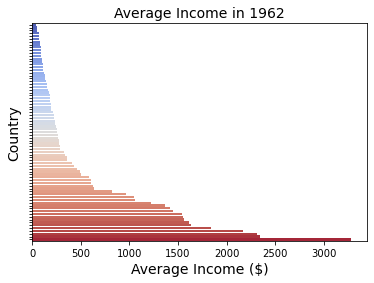

In [8]:
fig = plt.subplots()

graph1 = sns.barplot(x = "Value", y = "CountryName", palette = "coolwarm", data = GNI_1962)
graph1.set_yticklabels('')
plt.xlabel('Average Income ($)', fontsize = 14)
plt.ylabel('Country',  fontsize=14)
plt.title('Average Income in 1962', fontsize = 14)

Text(0.5, 0, 'Year')

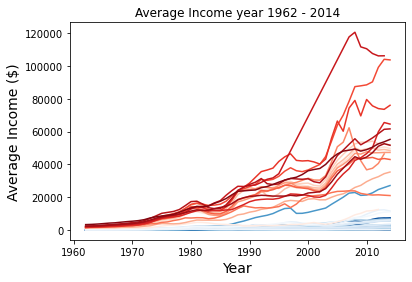

In [56]:

lowGNI_1962 = GNI_1962[GNI_1962['Value'] < 250]
lowGNI_1962_countries = lowGNI_1962['CountryName'].tolist()
list = lowGNI_1962_countries
GNP_lowGNI = documentCountry.query("IndicatorCode == 'NY.GNP.PCAP.CD' & CountryName == list")


palette_Blue = sns.color_palette("Blues",n_colors=len(lowGNI_1962_countries))
palette_Blue.reverse()
nyc_chart = sns.lineplot(
    x="Year",
    y="Value",
    hue= 'CountryRank',
    data= GNP_lowGNI,
    palette= palette_Blue,
).set_title('Average Income year 1962 - 2014')

highGNI_1962 = GNI_1962[GNI_1962['Value'] > 1000]
highGNI_1962_countries = highGNI_1962['CountryName'].tolist()
list = highGNI_1962_countries
GNP_highGNI = documentCountry.query("IndicatorCode == 'NY.GNP.PCAP.CD' & CountryName == list")

palette_Red = sns.color_palette("Reds",n_colors=len(highGNI_1962_countries))
nyc_chart = sns.lineplot(
    x="Year",
    y="Value",
    hue="CountryRank",
    data=GNP_highGNI,
    palette=palette_Red 
).set_title('Average Income year 1962 - 2014')

plt.legend([],[], frameon=False)
plt.ylabel('Average Income ($)', fontsize = 14)
plt.xlabel('Year', fontsize = 14)

* ['income share held by fourth 20%' 'SI.DST.04TH.20']
* ['income share held by highest 10%' 'SI.DST.10TH.10']
* ['income share held by highest 20%' 'SI.DST.05TH.20']
* ['income share held by lowest 10%' 'SI.DST.FRST.10']
* ['income share held by lowest 20%' 'SI.DST.FRST.20']
* ['income share held by second 20%' 'SI.DST.02ND.20']
* ['income share held by third 20%' 'SI.DST.03RD.20']

In [57]:
GNI_1962.iloc[[0,10]]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
72386,Rwanda,RWA,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,1962,40.0
70680,Pakistan,PAK,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,1962,90.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Legend does not support 'Rwanda' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Legend does not support 'Pakistan' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


Rwanda


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pakistan


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iceland


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


United States


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0, 0.5, '')

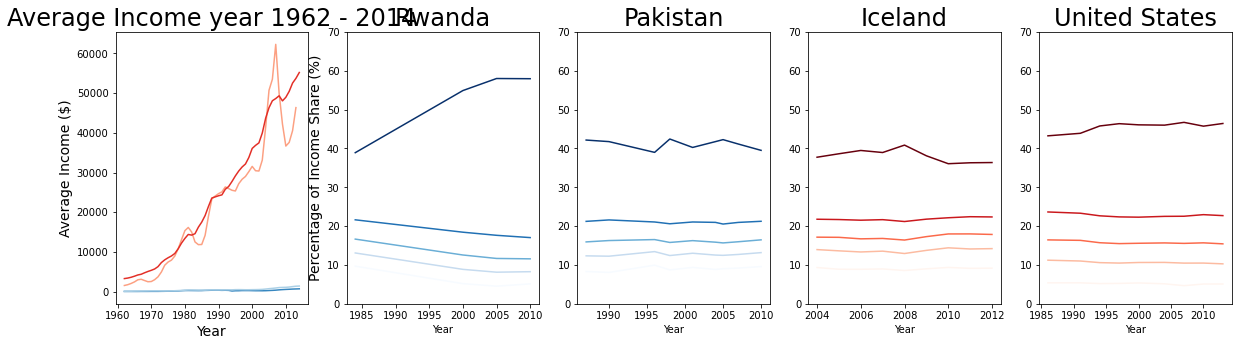

In [127]:
interval_dict = {interval:rankIdx for rankIdx, interval in enumerate(IncomeInterval)}

plt.figure(figsize=(20,5))

ax=plt.subplot(1, 5, 1)
lowGNI_1962 = GNI_1962.iloc[[0,10]]
countries_names = lowGNI_1962['CountryName'].tolist()
list = countries_names
GNP_lowGNI = documentCountry.query("IndicatorCode == 'NY.GNP.PCAP.CD' & CountryName == list")
palette_Blue = sns.color_palette("Blues",n_colors=len(countries_names))
palette_Blue.reverse()
nyc_chart = sns.lineplot(
    ax = ax, 
    x="Year",
    y="Value",
    hue= 'CountryRank',
    data= GNP_lowGNI,
    palette= palette_Blue,
).set_title('Average Income year 1962 - 2014')

highGNI_1962 = GNI_1962.iloc[[-10,-1]]
countries_names = highGNI_1962['CountryName'].tolist()
list = countries_names
GNP_highGNI = documentCountry.query("IndicatorCode == 'NY.GNP.PCAP.CD' & CountryName == list")
palette_Red = sns.color_palette("Reds",n_colors=len(countries_names))
nyc_chart = sns.lineplot(
    ax = ax,
    x="Year",
    y="Value",
    hue="CountryRank",
    data=GNP_highGNI,
    palette=palette_Red 
).set_title('Average Income \n year 1962 - 2014', fontsize = 24)

plt.legend(['Rwanda','Pakistan'],['Iceland','United States'], frameon=False)
plt.ylabel('Average Income ($)', fontsize = 14)
plt.xlabel('Year', fontsize = 14)

ax1=plt.subplot(1, 5, 2)

low_country = lowGNI_1962_countries[0]
print(low_country)
IncomeInterval = ['SI.DST.FRST.20', 'SI.DST.02ND.20', 'SI.DST.03RD.20', 'SI.DST.04TH.20', 'SI.DST.05TH.20' ]
list = IncomeInterval
GNP_Rwanda = documentCountry.query("IndicatorCode == list & CountryName == 'Rwanda'")
GNP_Rwanda['IncomeInterval'] = GNP_Rwanda['IndicatorCode'].map(interval_dict)
# print(GNP_Rwanda)
nyc_chart = sns.lineplot(
    ax = ax1,
    x="Year",
    y="Value",
    hue= 'IncomeInterval',
    data= GNP_Rwanda,
    palette= 'Blues',
).set_title('Rwanda', fontsize = 24)
plt.legend([],[], frameon=False)
plt.ylim((0, 70))
plt.ylabel('Percentage of Income Share (%)', fontsize = 14)

ax2=plt.subplot(1, 5, 3)

low_country = lowGNI_1962_countries[10]
print(low_country)
IncomeInterval = ['SI.DST.FRST.20', 'SI.DST.02ND.20', 'SI.DST.03RD.20', 'SI.DST.04TH.20', 'SI.DST.05TH.20' ]
list = IncomeInterval
GNP_Pakistan = documentCountry.query("IndicatorCode == list & CountryName == 'Pakistan'")
GNP_Pakistan['IncomeInterval'] = GNP_Pakistan['IndicatorCode'].map(interval_dict)
# print(GNP_Rwanda)
nyc_chart = sns.lineplot(
    ax = ax2,
    x="Year",
    y="Value",
    hue= 'IncomeInterval',
    data= GNP_Pakistan,
    palette= 'Blues',
).set_title('Pakistan', fontsize = 24)
plt.legend([],[], frameon=False)
plt.ylim((0, 70))
plt.ylabel("")

ax3=plt.subplot(1, 5, 4)
high_country = highGNI_1962_countries[-10]
print(high_country)
IncomeInterval = ['SI.DST.FRST.20', 'SI.DST.02ND.20', 'SI.DST.03RD.20', 'SI.DST.04TH.20', 'SI.DST.05TH.20' ]
list = IncomeInterval
GNP_Iceland = documentCountry.query("IndicatorCode == list & CountryName == 'Iceland'")
GNP_Iceland['IncomeInterval'] = GNP_Iceland['IndicatorCode'].map(interval_dict)
# print(GNP_US)
nyc_chart = sns.lineplot(
    ax = ax3,
    x="Year",
    y="Value",
    hue= 'IncomeInterval',
    data= GNP_Iceland,
    palette= 'Reds',
).set_title('Iceland', fontsize = 24)
plt.legend([],[], frameon=False)
plt.ylim((0, 70))
plt.ylabel("")

ax4=plt.subplot(1, 5, 5)

high_country = highGNI_1962_countries[-1]
print(high_country)
IncomeInterval = ['SI.DST.FRST.20', 'SI.DST.02ND.20', 'SI.DST.03RD.20', 'SI.DST.04TH.20', 'SI.DST.05TH.20' ]
list = IncomeInterval
GNP_US = documentCountry.query("IndicatorCode == list & CountryName == 'United States'")
GNP_US['IncomeInterval'] = GNP_US['IndicatorCode'].map(interval_dict)
# print(GNP_US)
nyc_chart = sns.lineplot(
    ax = ax4,
    x="Year",
    y="Value",
    hue= 'IncomeInterval',
    data= GNP_US,
    palette= 'Reds',
).set_title('United States', fontsize = 24)
plt.legend([],[], frameon=False)
plt.ylim((0, 70))
plt.ylabel("")

In [ ]:
documentCountry.query("IndicatorCode == 'EN.CO2.TRAN.ZS'& CountryName == list")

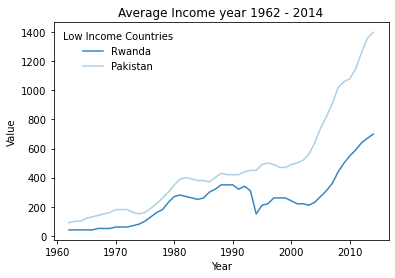

In [117]:
ax = plt.subplot()
lowGNI_1962 = GNI_1962.iloc[[0,10]]
countries_names = lowGNI_1962['CountryName'].tolist()
list = countries_names
GNP_lowGNI = documentCountry.query("IndicatorCode == 'NY.GNP.PCAP.CD' & CountryName == list")
palette_Blue = sns.color_palette("Blues",n_colors=len(countries_names))
palette_Blue.reverse()
nyc_chart1 = sns.lineplot(
    ax = ax, 
    x="Year",
    y="Value",
    hue= 'CountryRank',
    data= GNP_lowGNI,
    palette= palette_Blue,
)
nyc_chart1.set_title('Average Income year 1962 - 2014')
legend = plt.legend(title='Low Income Countries', loc='upper left', labels=['Rwanda','Pakistan'],frameon=False)

Text(0.5, 0, 'Year')

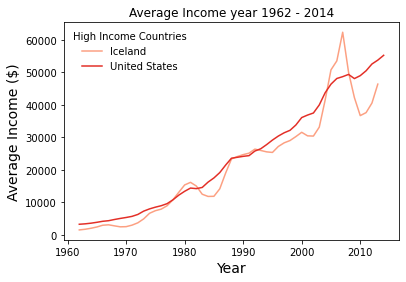

In [116]:
ax = plt.subplot()
highGNI_1962 = GNI_1962.iloc[[-10,-1]]
countries_names = highGNI_1962['CountryName'].tolist()
list = countries_names
GNP_highGNI = documentCountry.query("IndicatorCode == 'NY.GNP.PCAP.CD' & CountryName == list")
palette_Red = sns.color_palette("Reds",n_colors=len(countries_names))
nyc_chart2 = sns.lineplot(
    ax = ax,
    x="Year",
    y="Value",
    hue="CountryRank",
    data=GNP_highGNI,
    palette=palette_Red,
)
nyc_chart2.set_title('Average Income year 1962 - 2014')
plt.legend(title= 'High Income Countries', loc='upper left', labels=['Iceland','United States'],frameon=False)

plt.ylabel('Average Income ($)', fontsize = 14)
plt.xlabel('Year', fontsize = 14)

Iceland


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Text(0, 0.5, '')

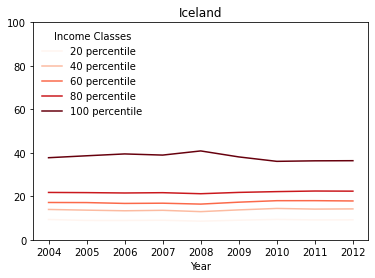

In [123]:
ax3=plt.subplot()
high_country = highGNI_1962_countries[-10]
print(high_country)
IncomeInterval = ['SI.DST.FRST.20', 'SI.DST.02ND.20', 'SI.DST.03RD.20', 'SI.DST.04TH.20', 'SI.DST.05TH.20' ]
list = IncomeInterval
GNP_Iceland = documentCountry.query("IndicatorCode == list & CountryName == 'Iceland'")
GNP_Iceland['IncomeInterval'] = GNP_Iceland['IndicatorCode'].map(interval_dict)
# print(GNP_US)
nyc_chart = sns.lineplot(
    ax = ax3,
    x="Year",
    y="Value",
    hue= 'IncomeInterval',
    data= GNP_Iceland,
    palette= 'Reds',
).set_title('Iceland')
plt.legend(title= 'Income Classes', loc='upper left', labels=['20 percentile', '40 percentile', '60 percentile', '80 percentile', '100 percentile'], frameon=False)
plt.ylim((0, 100))
plt.ylabel("")

Pakistan


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, '')

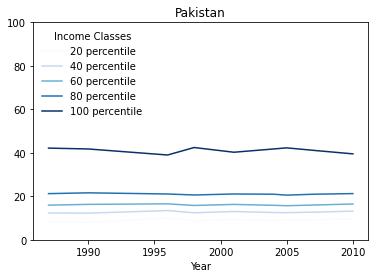

In [125]:
ax2=plt.subplot()

low_country = lowGNI_1962_countries[10]
print(low_country)
IncomeInterval = ['SI.DST.FRST.20', 'SI.DST.02ND.20', 'SI.DST.03RD.20', 'SI.DST.04TH.20', 'SI.DST.05TH.20' ]
list = IncomeInterval
GNP_Pakistan = documentCountry.query("IndicatorCode == list & CountryName == 'Pakistan'")
GNP_Pakistan['IncomeInterval'] = GNP_Pakistan['IndicatorCode'].map(interval_dict)
# print(GNP_Rwanda)
nyc_chart = sns.lineplot(
    ax = ax2,
    x="Year",
    y="Value",
    hue= 'IncomeInterval',
    data= GNP_Pakistan,
    palette= 'Blues',
).set_title('Pakistan')
plt.legend(title= 'Income Classes', loc='upper left', labels=['20 percentile', '40 percentile', '60 percentile', '80 percentile', '100 percentile'], frameon=False)
plt.ylim((0, 100))
plt.ylabel("")